In [15]:
import sys
sys.path.append("..")

import torch
import numpy as np
import pandas as pd
from ecg_bib import ECG_Dataset, ECG_CNN_Classifier, train
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from tqdm import tqdm
from biosppy.signals import ecg

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = ECG_Dataset('../data/train_dccweek2023.h5',
                            '../data/train_dccweek2023-labels.csv',
                             start = 0, end = 45000)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = ECG_Dataset('../data/train_dccweek2023.h5',
                            '../data/train_dccweek2023-labels.csv',
                             start = 45000, end = -1)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# model = ECG_CNN_Classifier().to(device)

# criterion = nn.CrossEntropyLoss()

# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [80]:
rpeaks = ecg.ecg(signal=tracing[1], sampling_rate=400, show=False)['rpeaks']
out = ecg.extract_heartbeats(signal=tracing[1], rpeaks=rpeaks, sampling_rate=400, before=0.2, after=0.4)[0][0]

In [86]:
prevalence = [0 for i in range(7)]
for tracings, labels in val_loader:
    prevalence[labels[0].item()] += 1
[x/len(val_loader.dataset) for x in prevalence]

[0.9025034986782771,
 0.013372725859119888,
 0.017260146167003578,
 0.01694915254237288,
 0.012284248172912455,
 0.02021458560099518,
 0.017415642979318923]

In [91]:
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)
_, labels = next(iter(val_loader))

In [54]:
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

rates = {i:[] for i in range(7)}
for i, (tracings, labels) in tqdm(enumerate(val_loader)):
    if labels[0].item() == 0 or i > 1000: continue
    features = ecg.ecg(signal=tracings[0][1], sampling_rate=400, show=False)
    try:
        heart_rate = (max(features[-1]), min(features[-1]))
    except:
        continue
    rates[labels[0].item()].append(heart_rate)

6431it [00:04, 1334.50it/s]


In [55]:
rates[4][:10]

[(46.61985482938995, 46.03640634174985),
 (50.96197934465366, 50.31624199464176),
 (40.26845637583892, 40.17867163475567),
 (48.822570853436424, 46.81408382066276),
 (50.03595034520994, 49.45393639377684),
 (45.90533108137369, 44.69398197621194),
 (48.686790818628324, 45.89213876488369),
 (48.48484848484848, 47.74603174603174),
 (47.91223997280158, 45.69144615296139),
 (44.0082398221933, 43.402179216132694)]

In [58]:
rates[6][:10]

[(89.71088612879657, 61.074158767510184),
 (85.51470208702534, 68.46014303576264),
 (99.24588968911667, 80.54111590236582),
 (159.7341601580386, 115.43045517940915),
 (118.70065179375763, 92.58775670588938),
 (122.9636152583757, 89.86360629780715),
 (126.06060606060605, 90.90334788452779),
 (152.77240197975772, 108.59728506787332),
 (145.65981300405295, 95.21425151611874),
 (119.73023701641529, 86.75389197047325)]

In [34]:
list(out)[-1]

array([66.07051981, 65.55974567, 65.8239901 , 66.0863127 , 63.7900693 ,
       63.20389328, 65.12054785])

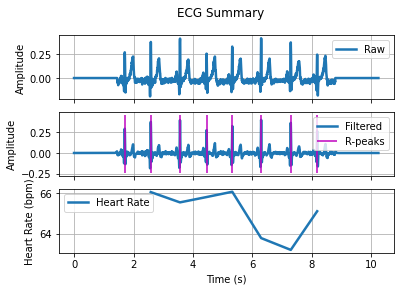

In [19]:
out = ecg.ecg(signal=tracing[1], sampling_rate=400, show=True)